# **라이브러리**

In [171]:
import pandas as pd
import numpy as np

from imblearn.under_sampling import *
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'

# **함수모음**

## **모델링**

In [172]:
def modeling(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)
    pred = (pred[:,0] < 0.4)*1         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred

## **스코어**

In [173]:
def scoring(y_true, y_pred):
    print('f1-Score:', f1_score(y_true, y_pred, average='macro'))
    print('Recall:',recall_score(y_true, y_pred, average='macro'))
    print('Precision:',precision_score(y_true, y_pred, average='macro'))   

In [174]:
dataset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Data\최종데이터셋\Finaldataset_ver7.5.csv',index_col=0)

In [175]:
dataset.loc[dataset['부도'] == 1]['신종채권'].value_counts()

0.0    402
Name: 신종채권, dtype: int64

In [142]:
dataset['부도'].value_counts()

0.0    26430
1.0      402
Name: 부도, dtype: int64

## **set1**

In [62]:
drop_feature = ['회사명', '거래소코드', '회계년도', '년', 'key', '정기공시제목', '수시공시제목', '부도',
'기타', '외국인_주식분포비율', '종가','유동비율', '당좌비율', '순운전자본비율',
       '부채비율', '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율', '총자본순이익률',
       '자기자본영업이익률', '총자본영업이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률',
       '매출액영업이익률', '당좌자산회전률', '재고자산회전률', '자기자본회전률', '비유동자산회전률',
       '매출채권회전률', '매입채무회전률', '유형자산회전율',  '자기자본증가율',
       '매출액증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액',
       '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율',
       '매출원가율', '재고자산보유기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율','최대주주_변경', '회계처리위반', '횡령배임','영업조업중단']
 
text_col = ['대표이사_변경','신종채권','출자목적_투자','출자목적_경영권','출자목적_영업이익','종가변동률']

## **set2**

In [176]:
drop_feature = ['회사명', '거래소코드', '회계년도', '년', 'key', '정기공시제목', '수시공시제목', '부도',
'기타', '외국인_주식분포비율', '종가','유동비율', '당좌비율', '순운전자본비율',
       '부채비율', '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율', '총자본순이익률',
       '자기자본영업이익률', '총자본영업이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률',
       '매출액영업이익률', '당좌자산회전률', '재고자산회전률', '자기자본회전률', '비유동자산회전률',
       '매출채권회전률', '매입채무회전률', '유형자산회전율',  '자기자본증가율',
       '매출액증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액',
       '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율',
       '매출원가율', '재고자산보유기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율', '최대주주_변경', '회계처리위반', '횡령배임','영업조업중단','신종채권']
 
text_col = ['대표이사_변경', '종가변동률','출자목적_투자', '출자목적_경영권', '출자목적_영업이익']

# **set3**

In [145]:
drop_feature = ['회사명', '거래소코드', '회계년도', '년', 'key', '정기공시제목', '수시공시제목', '부도',
'기타', '외국인_주식분포비율', '종가','유동비율', '당좌비율', '순운전자본비율',
       '부채비율', '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율', '총자본순이익률',
       '자기자본영업이익률', '총자본영업이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률',
       '매출액영업이익률', '당좌자산회전률', '재고자산회전률', '자기자본회전률', '비유동자산회전률',
       '매출채권회전률', '매입채무회전률', '유형자산회전율',  '자기자본증가율',
       '매출액증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액',
       '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율',
       '매출원가율', '재고자산보유기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율','출자목적_투자', '출자목적_경영권', '출자목적_영업이익', '최대주주_변경', '회계처리위반', '횡령배임','영업조업중단',
       '유동부채비율', '비유동비율', '자기자본순이익률', '경영자본순이익률', '경영자본회전률', '설비투자효율',
       '총자본투자효율', '영업이익증가율', '부가가치율', '매출채권회수기간', 'EBITDA단기차입비율']
 
text_col = ['대표이사_변경','종가변동률']

In [177]:
ajX = dataset.drop(drop_feature, axis=1)
X = ajX.drop(text_col, axis = 1)
ajy = dataset['부도']
y = dataset['부도']

# **재무데이터 + 비재무데이터**

In [178]:
ajX_train, ajX_test, ajy_train, ajy_test = train_test_split(ajX, ajy, test_size=0.2, stratify=ajy, random_state = 488)
ajX_train , ajy_train = RandomUnderSampler(random_state=0).fit_resample(ajX_train , ajy_train)

In [179]:
ajdt_clf = modeling(DecisionTreeClassifier(), ajX_train, ajy_train, ajX_test)
ajrf_clf = modeling(RandomForestClassifier(),ajX_train, ajy_train, ajX_test)
ajada_clf = modeling(AdaBoostClassifier(), ajX_train, ajy_train, ajX_test)
ajlg_clf = modeling(LogisticRegression(), ajX_train, ajy_train, ajX_test)
ajknn_clf = modeling(KNeighborsClassifier(), ajX_train, ajy_train, ajX_test)
ajsvc_clf = modeling(SVC(probability=True), ajX_train, ajy_train, ajX_test)
ajlgmb_clf = modeling(LGBMClassifier(), ajX_train, ajy_train, ajX_test)
ajcat_clf = modeling(CatBoostClassifier(silent=True),ajX_train, ajy_train, ajX_test)
ajmlp_clf = modeling(MLPClassifier(),ajX_train, ajy_train, ajX_test)
ajxgb_clf = modeling(XGBClassifier(),ajX_train, ajy_train, ajX_test)

[20:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [194]:
scoring(ajy_test , ajcat_clf)

f1-Score: 0.5725789521862509
Recall: 0.8521467751087574
Precision: 0.5544726418924109


In [193]:
confusion_matrix(ajy_test, ajcat_clf)  # 59 62

array([[4781,  506],
       [  16,   64]], dtype=int64)

array([[  4014,   931],
       [ 11, 69]], dtype=int64)

# **재무데이터only**

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 469)
X_train, y_train = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

In [183]:
dt_clf = modeling(DecisionTreeClassifier(), X_train, y_train, X_test)
rf_clf = modeling(RandomForestClassifier(), X_train, y_train, X_test)
ada_clf = modeling(AdaBoostClassifier(), X_train, y_train, X_test)
lg_clf = modeling(LogisticRegression(), X_train, y_train, X_test)
knn_clf = modeling(KNeighborsClassifier(), X_train, y_train, X_test)
svc_clf = modeling(SVC(probability=True), X_train, y_train, X_test)
lgmb_clf = modeling(LGBMClassifier(), X_train, y_train, X_test)
cat_clf = modeling(CatBoostClassifier(silent=True),X_train, y_train, X_test)
mlp_clf = modeling(MLPClassifier(),X_train, y_train, X_test)
xgb_clf = modeling(XGBClassifier(),X_train, y_train, X_test)

[20:37:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [192]:
scoring(y_test , cat_clf)

f1-Score: 0.5578696740415858
Recall: 0.8226073387554378
Precision: 0.5467560004961721


In [185]:
confusion_matrix(y_test, xgb_clf) # 42 79

array([[4607,  680],
       [  21,   59]], dtype=int64)

In [189]:
model = CatBoostClassifier(silent=True)
model.fit(ajX_train, ajy_train)

In [190]:
plt.rcParams['figure.figsize'] = (6, 12)

<BarContainer object of 16 artists>

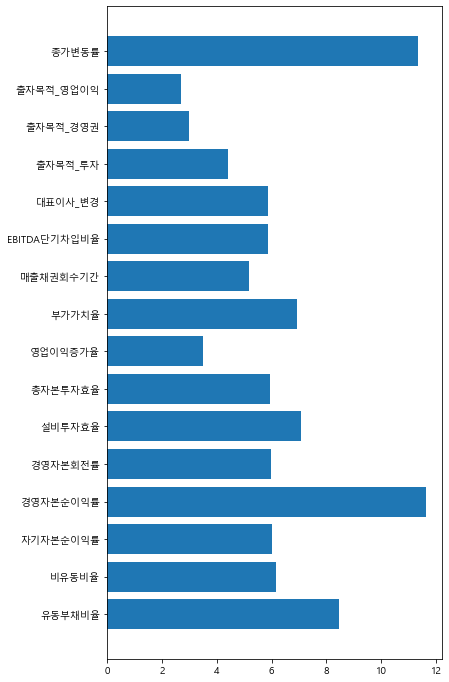

In [191]:
plt.barh(ajX_train.columns, model.feature_importances_ )